# 1. Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.


# 2. Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


# 3. Importing Dataset

In [2]:
df_customer = pd.read_csv('/kaggle/input/customer-personality-analysis/marketing_campaign.csv', sep = '\t')

**Data Dictionary**

**People**

* `ID`: Customer's unique identifier
* `Year_Birth`: Customer's birth year
* `Education`: Customer's education level
* `Marital_Status`: Customer's marital status
* `Income`: Customer's yearly household income
* `Kidhome`: Number of children in customer's household
* `Teenhome`: Number of teenagers in customer's household
* `Dt_Customer`: Date of customer's enrollment with the company
* `Recency`: Number of days since customer's last purchase
* `Complain`: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

* `MntWines` -  Amount spent on wine in last 2 years
* `MntFruits` - Amount spent on fruits in last 2 years
* `MntMeatProducts` -  Amount spent on meat in last 2 years
* `MntFishProducts` -  Amount spent on fish in last 2 years
* `MntSweetProducts` -  Amount spent on sweets in last 2 years
* `MntGoldProds` -  Amount spent on gold in last 2 years

**Promotion**

* `NumDealsPurchases` -  Number of purchases made with a discount
* `AcceptedCmp1` -  1 if customer accepted the offer in the 1st campaign, 0 otherwise
* `AcceptedCmp2` -  1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* `AcceptedCmp3` -  1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* `AcceptedCmp4` -  1 if customer accepted the offer in the 4th campaign, 0 otherwise
* `AcceptedCmp5` -  1 if customer accepted the offer in the 5th campaign, 0 otherwise
* `Response` -  1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

* `NumWebPurchases` -  Number of purchases made through the company’s website
* `NumCatalogPurchases` -  Number of purchases made using a catalogue
* `NumStorePurchases` -  Number of purchases made directly in stores
* `NumWebVisitsMonth` -  Number of visits to company’s website in the last month

# 3. Data Exploration and Cleaning

In [3]:
df_customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df_customer.shape

(2240, 29)

The dataset contains 2240 rows and 29 columns.

In [5]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

* `income` column contains a few null values.
* `Dt_Customer` has object datatype,but it holds date values. Hence, it's necessary to change its datatype to a date format before proceeding with data analysis.

In [6]:
df_customer.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
df_customer['Dt_Customer'] = pd.to_datetime(df_customer['Dt_Customer'], dayfirst = True)
df_customer.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

There are 24 null values present in the 'income' column. Given that this number is very small compared to the total dataset size of 2240, we can safely remove these null values for our analysis.

In [8]:
df_customer = df_customer.dropna(axis = 0)
df_customer.isna().sum().sum()

0

In [9]:
df_customer.shape

(2216, 29)

In [10]:
df_customer.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

**Renaming the column names to make them standardized in 'snake case' format and more accessible for better understanding of their meaning.**

In [11]:
df_customer.rename(columns = {
    'Year_Birth' : 'birth_year',
    'Education' : 'education',
    'Marital_Status' : 'marital_status',
    'Income' : 'income',
    'Kidhome' : 'kids',
    'Teenhome' : 'teens',
    'Dt_Customer' : 'enrollment_date', 
    'Recency' : 'days_since_last_purchase',
    'MntWines' : 'spent_on_wines',
    'MntFruits' : 'spent_on_fruits',
    'MntMeatProducts' : 'spent_on_meat',
    'MntFishProducts' : 'spent_on_fish',
    'MntSweetProducts' : 'spent_on_sweet',
    'MntGoldProds' : 'spent_on_gold',
    'NumDealsPurchases' : 'purchases_with_discount', 
    'NumWebPurchases' : 'web_purchase',
    'NumCatalogPurchases' : 'catalog_purchase', 
    'NumStorePurchases' : 'store_purchase', 
    'NumWebVisitsMonth' : 'website_visit_last_month',
    'AcceptedCmp3' : 'campaign3',
    'AcceptedCmp4' : 'campaign4', 
    'AcceptedCmp5': 'campaign5', 
    'AcceptedCmp1': 'campaign1',
    'AcceptedCmp2' : 'campaign2',
    'Complain' : 'complain',
    'Response' : 'last_campaign'
}, inplace = True)

df_customer.columns

Index(['ID', 'birth_year', 'education', 'marital_status', 'income', 'kids',
       'teens', 'enrollment_date', 'days_since_last_purchase',
       'spent_on_wines', 'spent_on_fruits', 'spent_on_meat', 'spent_on_fish',
       'spent_on_sweet', 'spent_on_gold', 'purchases_with_discount',
       'web_purchase', 'catalog_purchase', 'store_purchase',
       'website_visit_last_month', 'campaign3', 'campaign4', 'campaign5',
       'campaign1', 'campaign2', 'complain', 'Z_CostContact', 'Z_Revenue',
       'last_campaign'],
      dtype='object')

In [12]:
df_customer.describe()

,ID,birth_year,income,kids,teens,enrollment_date,days_since_last_purchase,spent_on_wines,spent_on_fruits,spent_on_meat,...,website_visit_last_month,campaign3,campaign4,campaign5,campaign1,campaign2,complain,Z_CostContact,Z_Revenue,last_campaign
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,2013-07-10 11:29:27.509025280,49.012635,305.091606,26.356047,166.995939,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,174.500000,8.000000,68.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417


**Checking the distribution of the data present in various variables.**


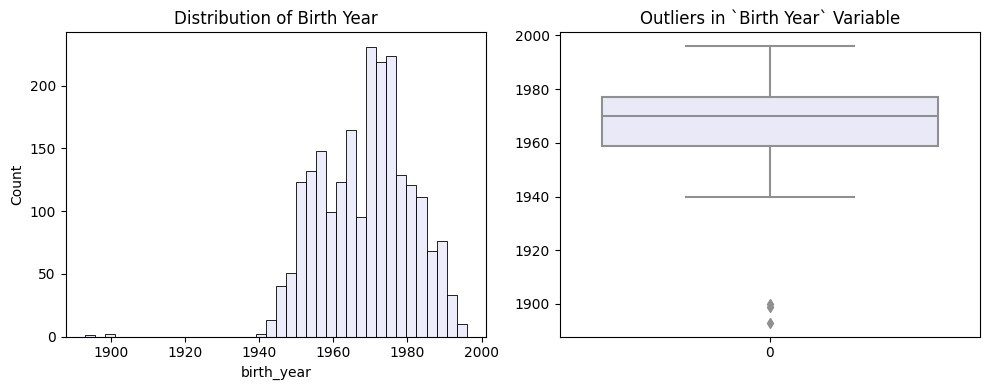

In [13]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_customer['birth_year'], color = 'lavender', ax = axes[0])
axes[0].set_title('Distribution of Birth Year')

sns.boxplot(df_customer['birth_year'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `Birth Year` Variable')

plt.tight_layout()

In [14]:
q1 = df_customer['birth_year'].quantile(.25)
q3 = df_customer['birth_year'].quantile(.75)

iqr = q3-q1

outlier = df_customer[df_customer['birth_year'] < (q1 - 1.5 * iqr)]
outlier

,ID,birth_year,education,marital_status,income,kids,teens,enrollment_date,days_since_last_purchase,spent_on_wines,...,website_visit_last_month,campaign3,campaign4,campaign5,campaign1,campaign2,complain,Z_CostContact,Z_Revenue,last_campaign
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,1,0,0,1,0,0,0,3,11,0


There are only 3 outliers present in the birth_year column. This suggests that the company have elderly customers as well.

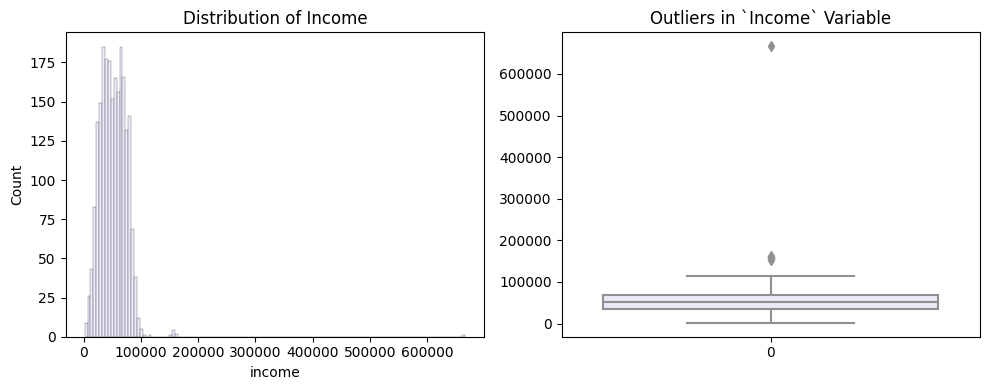

In [15]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_customer['income'], color = 'lavender', ax = axes[0])
axes[0].set_title('Distribution of Income')

sns.boxplot(df_customer['income'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `Income` Variable')

plt.tight_layout()

In [16]:
q1 = df_customer['income'].quantile(.25)
q3 = df_customer['income'].quantile(.75)

iqr = q3-q1

outlier = df_customer[df_customer['income'] > (q3 + 1.5 * iqr)]
outlier

,ID,birth_year,education,marital_status,income,kids,teens,enrollment_date,days_since_last_purchase,spent_on_wines,...,website_visit_last_month,campaign3,campaign4,campaign5,campaign1,campaign2,complain,Z_CostContact,Z_Revenue,last_campaign
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,1,0,0,0,0,0,0,3,11,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,1,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,1,0,0,0,0,0,0,3,11,0
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,6,0,0,0,0,0,0,3,11,0


From the distribution it is clear that the `income` variable is clustered together in the left. However, there are 8 outliers present  which have relatvely high income than the rest. Since, this variable isn't introducing bias, we will leave them as it is.

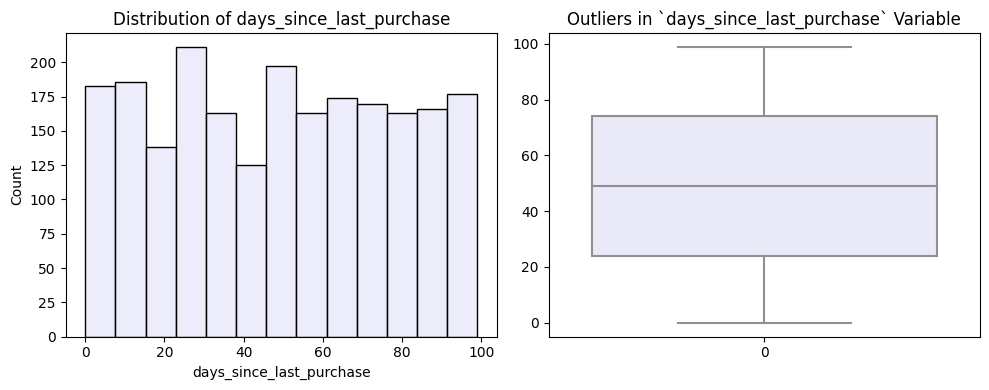

In [17]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_customer['days_since_last_purchase'], color = 'lavender', ax = axes[0])
axes[0].set_title('Distribution of days_since_last_purchase')

sns.boxplot(df_customer['days_since_last_purchase'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `days_since_last_purchase` Variable')

plt.tight_layout()

The variable `days_since_last_purchase` is approximately uniformally distributed, and ranges from 0 to 100.

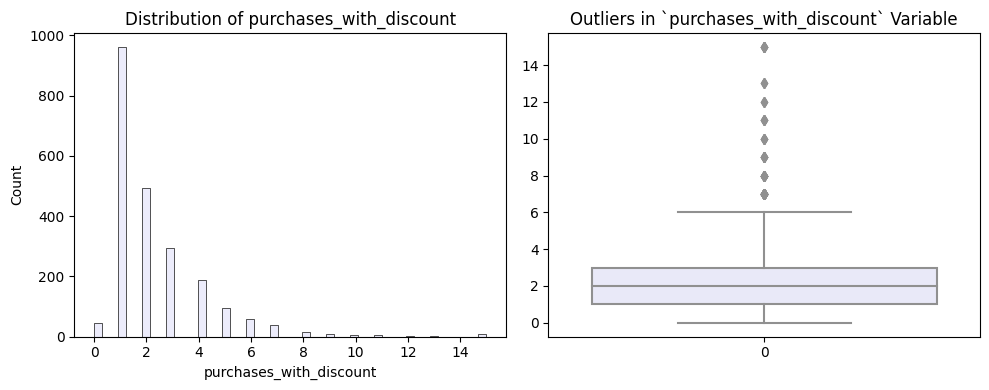

In [18]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_customer['purchases_with_discount'], color = 'lavender', ax = axes[0])
axes[0].set_title('Distribution of purchases_with_discount')

sns.boxplot(df_customer['purchases_with_discount'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `purchases_with_discount` Variable')

plt.tight_layout()

In [19]:
q1 = df_customer['purchases_with_discount'].quantile(.25)
q3 = df_customer['purchases_with_discount'].quantile(.75)

iqr = q3-q1

outlier = df_customer[df_customer['purchases_with_discount'] > (q3 + 1.5 * iqr)]
outlier

,ID,birth_year,education,marital_status,income,kids,teens,enrollment_date,days_since_last_purchase,spent_on_wines,...,website_visit_last_month,campaign3,campaign4,campaign5,campaign1,campaign2,complain,Z_CostContact,Z_Revenue,last_campaign
21,5376,1979,Graduation,Married,2447.0,1,0,2013-01-06,42,1,...,1,0,0,0,0,0,0,3,11,0
24,1409,1951,Graduation,Together,40689.0,0,1,2013-03-18,69,270,...,8,0,0,0,0,0,0,3,11,0
49,6566,1954,PhD,Married,72550.0,1,1,2012-11-08,39,826,...,8,0,0,0,0,0,0,3,11,0
54,9381,1978,Graduation,Married,66373.0,1,1,2013-06-12,57,328,...,3,0,0,0,0,0,0,3,11,0
69,1357,1970,Graduation,Together,74854.0,1,2,2013-04-08,90,856,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,4865,1974,Master,Divorced,53367.0,1,1,2013-08-31,2,229,...,7,0,0,0,0,0,0,3,11,1
2144,5136,1973,Graduation,Single,65333.0,0,1,2014-01-17,58,654,...,6,0,1,1,0,0,0,3,11,0
2198,2632,1954,Graduation,Married,50501.0,1,1,2013-06-18,10,297,...,6,1,0,0,0,0,0,3,11,1
2226,4478,1979,Graduation,Married,63777.0,1,1,2013-03-24,87,457,...,8,0,0,0,0,0,0,3,11,0


Most people have made purchases with a discount between 1 to 6 times. However, there are 84 outliers who have made purchases with a discount 7 times or more.

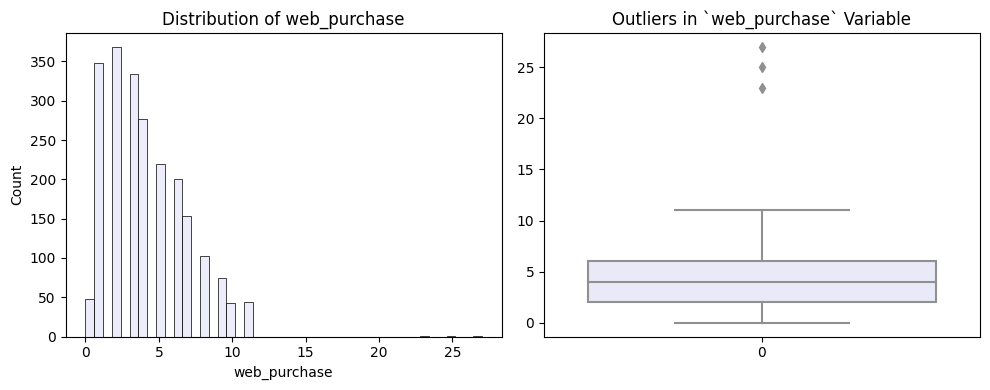

In [20]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_customer['web_purchase'], color = 'lavender', ax = axes[0])
axes[0].set_title('Distribution of web_purchase')

sns.boxplot(df_customer['web_purchase'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `web_purchase` Variable')

plt.tight_layout()

In [21]:
q1 = df_customer['web_purchase'].quantile(.25)
q3 = df_customer['web_purchase'].quantile(.75)

iqr = q3-q1

outlier = df_customer[df_customer['web_purchase'] > (q3 + 1.5 * iqr)]
outlier

,ID,birth_year,education,marital_status,income,kids,teens,enrollment_date,days_since_last_purchase,spent_on_wines,...,website_visit_last_month,campaign3,campaign4,campaign5,campaign1,campaign2,complain,Z_CostContact,Z_Revenue,last_campaign
1806,6237,1966,PhD,Single,7144.0,0,2,2013-12-07,92,81,...,0,0,0,0,0,0,0,3,11,0
1898,4619,1945,PhD,Single,113734.0,0,0,2014-05-28,9,6,...,1,0,0,0,0,0,0,3,11,0
1975,10311,1969,Graduation,Married,4428.0,0,1,2013-10-05,0,16,...,1,0,0,0,0,0,0,3,11,0


The majority of web purchases fall within the range of 0 to 12, with only 3 outliers.

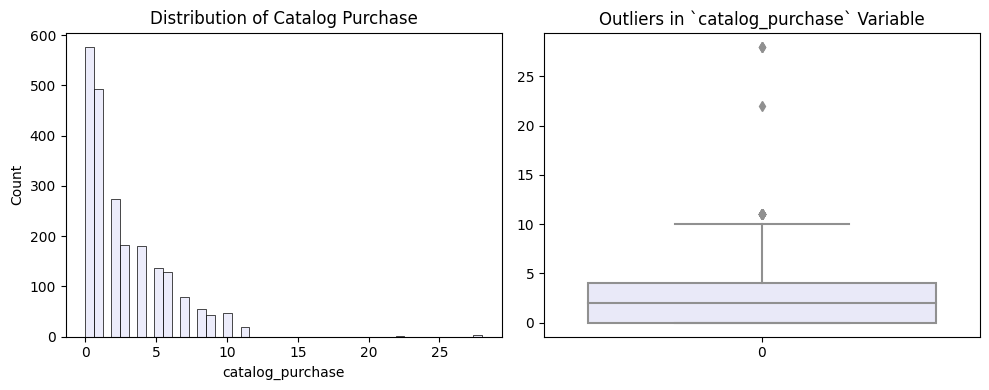

In [22]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_customer['catalog_purchase'], color = 'lavender', ax = axes[0])
axes[0].set_title('Distribution of Catalog Purchase')

sns.boxplot(df_customer['catalog_purchase'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `catalog_purchase` Variable')

plt.tight_layout()

In [23]:
q1 = df_customer['catalog_purchase'].quantile(.25)
q3 = df_customer['catalog_purchase'].quantile(.75)

iqr = q3-q1

outlier = df_customer[df_customer['catalog_purchase'] > (q3 + 1.5 * iqr)]

outlier['catalog_purchase'].value_counts()

catalog_purchase
11    19
28     3
22     1
Name: count, dtype: int64

The majority of catalog purchases fall within the range of 0 to 10, with only 23 observations where the number of catalog purchases exceeds 10.

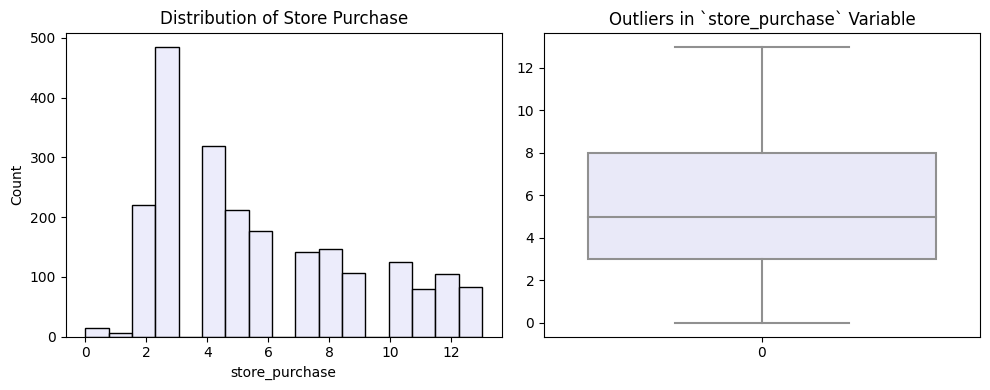

In [24]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_customer['store_purchase'], color = 'lavender', ax = axes[0])
axes[0].set_title('Distribution of Store Purchase')

sns.boxplot(df_customer['store_purchase'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `store_purchase` Variable')

plt.tight_layout()

The number of store purchases falls within the range of 0 to 13, and there are no outliers for this variable.

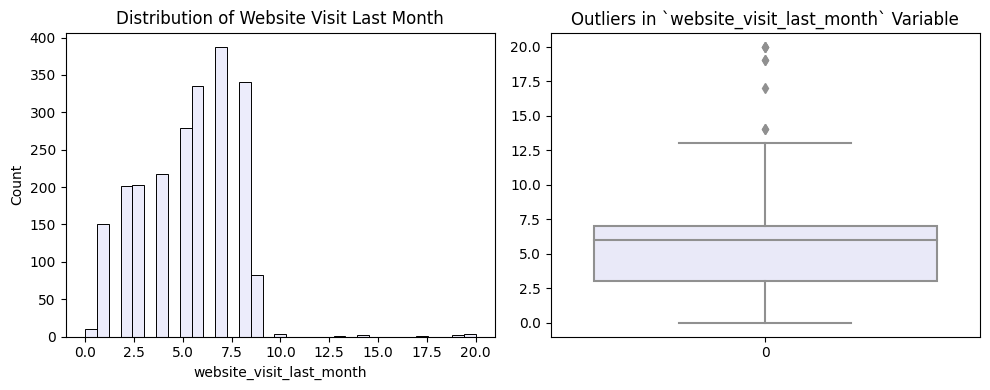

In [25]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_customer['website_visit_last_month'], color = 'lavender', ax = axes[0])
axes[0].set_title('Distribution of Website Visit Last Month')

sns.boxplot(df_customer['website_visit_last_month'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `website_visit_last_month` Variable')

plt.tight_layout()

In [26]:
q1 = df_customer['website_visit_last_month'].quantile(.25)
q3 = df_customer['website_visit_last_month'].quantile(.75)

iqr = q3-q1

outlier = df_customer[df_customer['website_visit_last_month'] > (q3 + 1.5 * iqr)]
outlier

,ID,birth_year,education,marital_status,income,kids,teens,enrollment_date,days_since_last_purchase,spent_on_wines,...,website_visit_last_month,campaign3,campaign4,campaign5,campaign1,campaign2,complain,Z_CostContact,Z_Revenue,last_campaign
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0
774,4303,1957,PhD,Together,6835.0,0,1,2012-12-08,76,107,...,20,0,0,0,0,0,0,3,11,0
981,3955,1965,Graduation,Divorced,4861.0,0,0,2014-06-22,20,2,...,14,0,0,0,0,0,0,3,11,0
1042,10749,1991,Graduation,Single,8028.0,0,0,2012-09-18,62,73,...,19,0,0,0,0,0,0,3,11,0
1245,6862,1971,Graduation,Divorced,1730.0,0,0,2014-05-18,65,1,...,20,0,0,0,0,0,0,3,11,0
1328,4246,1982,Master,Single,6560.0,0,0,2013-12-12,2,67,...,17,0,0,0,0,0,0,3,11,0
1524,11110,1973,Graduation,Single,3502.0,1,0,2013-04-13,56,2,...,14,0,0,0,0,0,0,3,11,0
1846,9931,1963,PhD,Married,4023.0,1,1,2014-06-23,29,5,...,19,0,0,0,0,0,0,3,11,0


The majority of website visits last month are in the range of 0 to 9, with 8 outlier observations having more than 16 visits on the website last month.

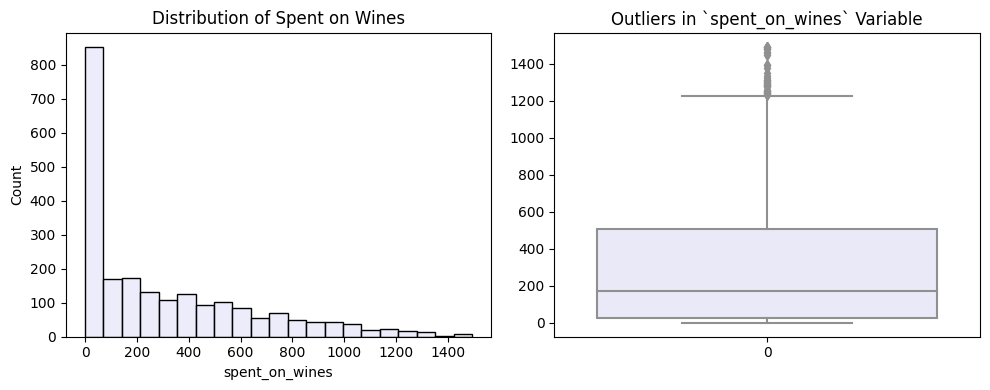

In [27]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_customer['spent_on_wines'], color = 'lavender', ax = axes[0])
axes[0].set_title('Distribution of Spent on Wines')

sns.boxplot(df_customer['spent_on_wines'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `spent_on_wines` Variable')

plt.tight_layout()

In [28]:
q1 = df_customer['spent_on_wines'].quantile(.25)
q3 = df_customer['spent_on_wines'].quantile(.75)

iqr = q3-q1

outlier = df_customer[df_customer['spent_on_wines'] > (q3 + 1.5 * iqr)]
outlier

,ID,birth_year,education,marital_status,income,kids,teens,enrollment_date,days_since_last_purchase,spent_on_wines,...,website_visit_last_month,campaign3,campaign4,campaign5,campaign1,campaign2,complain,Z_CostContact,Z_Revenue,last_campaign
111,7431,1991,PhD,Single,68126.0,0,0,2012-11-10,40,1332,...,9,0,1,0,0,0,0,3,11,1
161,9260,1945,PhD,Married,70356.0,0,0,2012-11-05,20,1349,...,6,0,0,0,0,0,0,3,11,0
295,2926,1952,Master,Together,55951.0,0,1,2012-08-23,62,1241,...,8,0,1,0,0,1,0,3,11,0
424,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,...,2,0,0,1,0,0,0,3,11,0
430,3725,1961,PhD,Single,84865.0,0,0,2013-05-09,1,1248,...,4,0,1,1,1,1,0,3,11,1
466,7999,1955,PhD,Together,75261.0,0,0,2013-04-23,17,1239,...,2,0,1,1,0,0,0,3,11,1
497,11088,1971,PhD,Together,78642.0,0,1,2013-04-21,83,1396,...,6,0,0,0,0,0,0,3,11,0
515,203,1975,Master,Single,81169.0,0,0,2013-04-14,47,1288,...,2,0,0,0,0,0,0,3,11,0
523,4943,1953,Graduation,Married,70503.0,0,0,2012-09-30,73,1379,...,6,0,1,1,0,0,0,3,11,0
543,5547,1982,PhD,Married,84169.0,0,0,2013-08-07,9,1478,...,3,0,1,1,0,0,0,3,11,1


The data is highly skewed to the right, indicating that the majority of people either don't drink wine or prefer to purchase it from other sources. Only 35 customers have spent more than $1000 on wine.

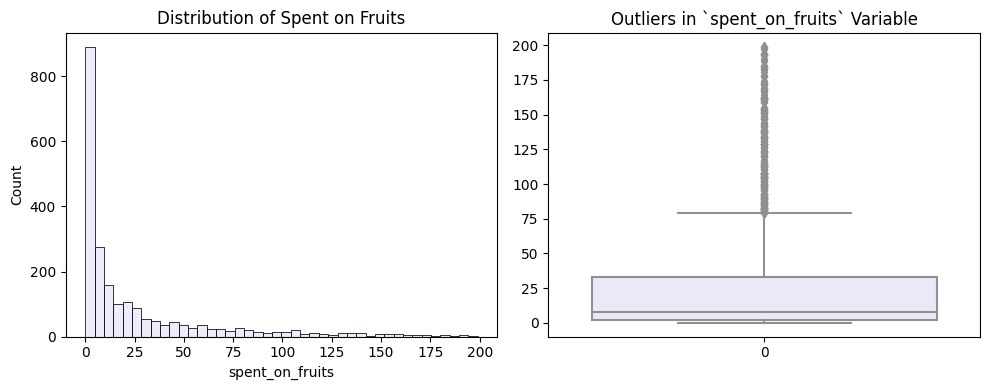

In [29]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_customer['spent_on_fruits'], color = 'lavender', ax = axes[0])
axes[0].set_title('Distribution of Spent on Fruits')

sns.boxplot(df_customer['spent_on_fruits'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `spent_on_fruits` Variable')

plt.tight_layout()

In [30]:
q1 = df_customer['spent_on_fruits'].quantile(.25)
q3 = df_customer['spent_on_fruits'].quantile(.75)

iqr = q3-q1

outlier = df_customer[df_customer['spent_on_fruits'] > (q3 + 1.5 * iqr)]
outlier['spent_on_fruits']

0        88
18       80
29      100
45      164
53      120
       ... 
2185    142
2194     80
2203    124
2206    129
2217    194
Name: spent_on_fruits, Length: 246, dtype: int64

The majority of customers have spent less than $60 on fruits.

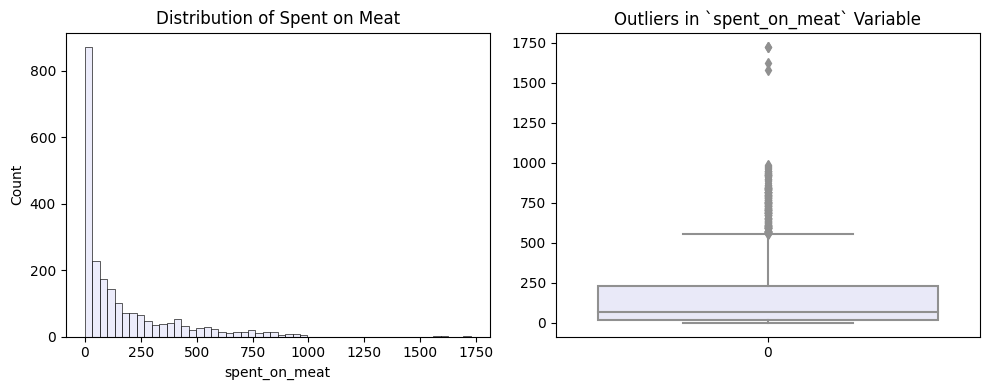

In [31]:
df_customer.columns

fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_customer['spent_on_meat'], color = 'lavender', ax = axes[0])
axes[0].set_title('Distribution of Spent on Meat')

sns.boxplot(df_customer['spent_on_meat'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `spent_on_meat` Variable')

plt.tight_layout()

In [32]:
q1 = df_customer['spent_on_meat'].quantile(.25)
q3 = df_customer['spent_on_meat'].quantile(.75)

iqr = q3-q1

outlier = df_customer[df_customer['spent_on_meat'] > (q3 + 1.5 * iqr)]
outlier['spent_on_meat']

21      1725
29       801
51       780
76       925
77       779
        ... 
2187     749
2190     655
2193     845
2211     860
2213     631
Name: spent_on_meat, Length: 174, dtype: int64


The majority of customers have spent less than $1000 on meat.

Text(0.5, 1.0, 'Outliers in `spent_on_fish` Variable')

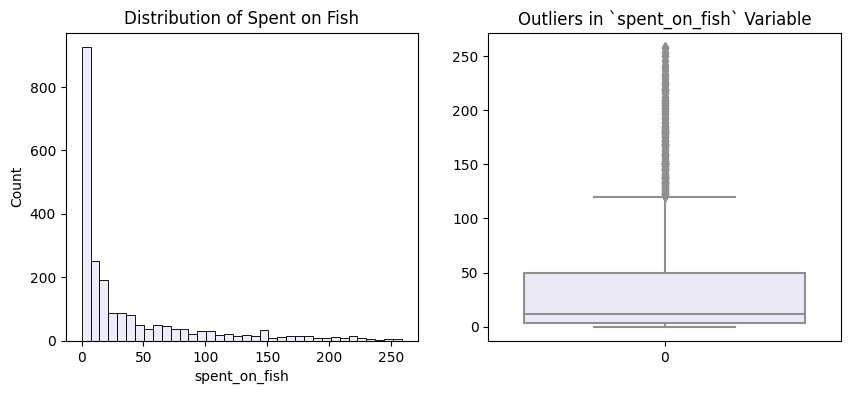

In [33]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_customer['spent_on_fish'], color = 'lavender', ax = axes[0])
axes[0].set_title('Distribution of Spent on Fish')

sns.boxplot(df_customer['spent_on_fish'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `spent_on_fish` Variable')

In [34]:
q1 = df_customer['spent_on_fish'].quantile(.25)
q3 = df_customer['spent_on_fish'].quantile(.75)

iqr = q3-q1

outlier = df_customer[df_customer['spent_on_fish'] > (q3 + 1.5 * iqr)]
outlier['spent_on_fish']

0       172
12      225
17      150
39      160
45      227
       ... 
2188    199
2190    145
2193    202
2206    182
2217    149
Name: spent_on_fish, Length: 222, dtype: int64

Text(0.5, 1.0, 'Outliers in `spent_on_sweet` Variable')

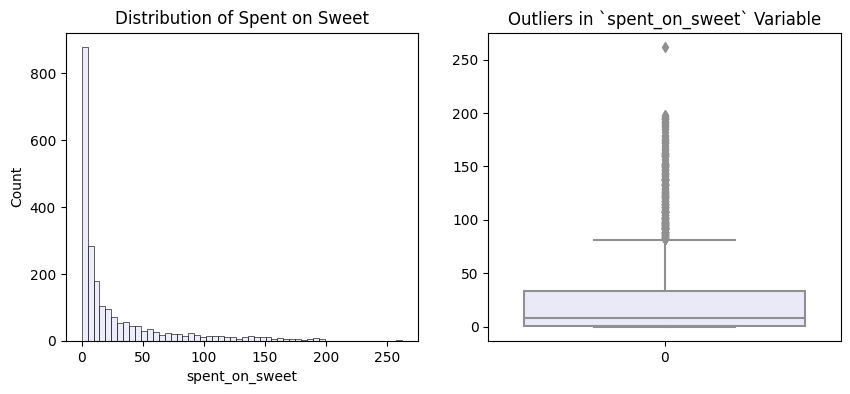

In [35]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_customer['spent_on_sweet'], color = 'lavender', ax = axes[0])
axes[0].set_title('Distribution of Spent on Sweet')

sns.boxplot(df_customer['spent_on_sweet'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `spent_on_sweet` Variable')

In [36]:
q1 = df_customer['spent_on_sweet'].quantile(.25)
q3 = df_customer['spent_on_sweet'].quantile(.75)

iqr = q3-q1

outlier = df_customer[df_customer['spent_on_sweet'] > (q3 + 1.5 * iqr)]
outlier['spent_on_sweet']

0        88
12      112
40      178
51      167
55      120
       ... 
2175     92
2190    111
2193    133
2217    125
2235    118
Name: spent_on_sweet, Length: 246, dtype: int64

Text(0.5, 1.0, 'Outliers in `spent_on_gold Variable')

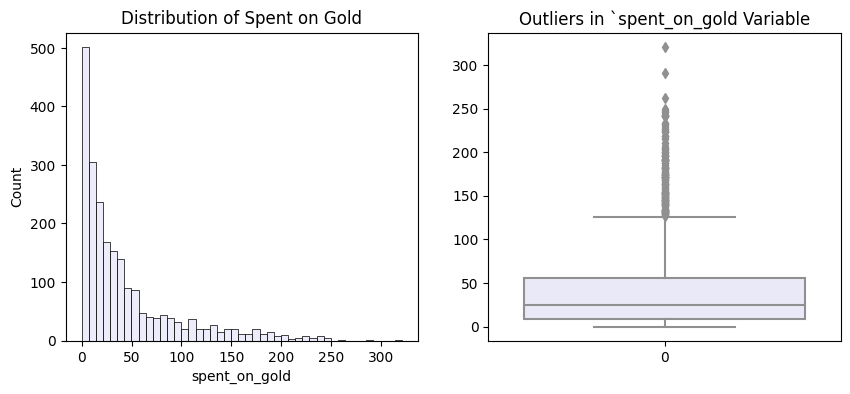

In [37]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.histplot(df_customer['spent_on_gold'], color = 'lavender', ax = axes[0])
axes[0].set_title('Distribution of Spent on Gold')

sns.boxplot(df_customer['spent_on_gold'], color = 'lavender', ax = axes[1])
axes[1].set_title('Outliers in `spent_on_gold Variable')

In [38]:
q1 = df_customer['spent_on_gold'].quantile(.25)
q3 = df_customer['spent_on_gold'].quantile(.75)

iqr = q3-q1

outlier = df_customer[df_customer['spent_on_gold'] > (q3 + 1.5 * iqr)]
outlier['spent_on_gold']

18      176
45      174
53      241
55      190
62      169
       ... 
2178    227
2188    163
2194    174
2198    152
2235    247
Name: spent_on_gold, Length: 205, dtype: int64

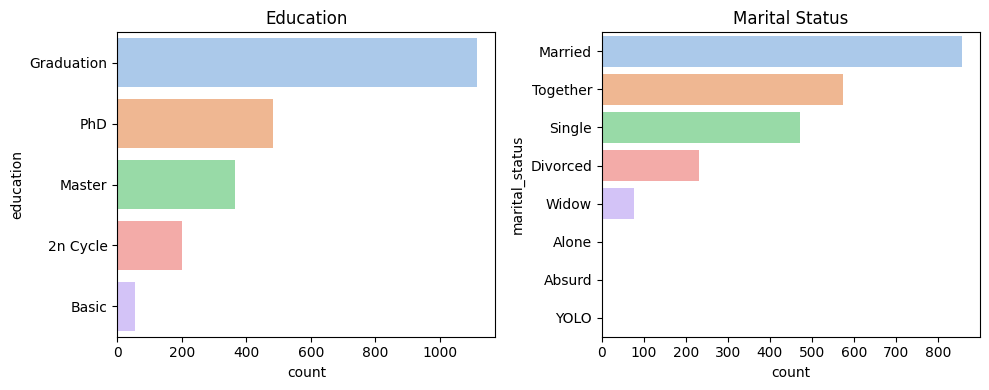

In [39]:
# categorical variables

education = df_customer['education'].value_counts()
marital_status = df_customer['marital_status'].value_counts()

fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.barplot(x = education,y = education.index, palette= 'pastel', ax = axes[0])
axes[0].set_title('Education')

sns.barplot(x = marital_status,y = marital_status.index, palette='pastel', ax = axes[1])
axes[1].set_title('Marital Status')

plt.tight_layout()

In [40]:
round(df_customer['complain'].value_counts(normalize = True)*100,2)

complain
0    99.05
1     0.95
Name: proportion, dtype: float64

The company received 0.95% complain from its customers in the last 2 years, which is a very good score.

In [41]:
round(df_customer['kids'].value_counts(normalize = True)*100,2)

kids
0    57.90
1    40.03
2     2.08
Name: proportion, dtype: float64

In [42]:
round(df_customer['teens'].value_counts(normalize = True)*100,2)

teens
0    51.76
1    45.94
2     2.30
Name: proportion, dtype: float64

In [43]:
round(df_customer['campaign1'].value_counts(normalize = True)*100,2)

campaign1
0    93.59
1     6.41
Name: proportion, dtype: float64

In [44]:
round(df_customer['campaign2'].value_counts(normalize = True)*100,2)

campaign2
0    98.65
1     1.35
Name: proportion, dtype: float64

In [45]:
round(df_customer['campaign3'].value_counts(normalize = True)*100,2)

campaign3
0    92.64
1     7.36
Name: proportion, dtype: float64

In [46]:
round(df_customer['campaign4'].value_counts(normalize = True)*100,2)

campaign4
0    92.6
1     7.4
Name: proportion, dtype: float64

In [47]:
round(df_customer['campaign5'].value_counts(normalize = True)*100,2)

campaign5
0    92.69
1     7.31
Name: proportion, dtype: float64

In [48]:
round(df_customer['last_campaign'].value_counts(normalize = True)*100,2)

last_campaign
0    84.97
1    15.03
Name: proportion, dtype: float64

The total percentage of customers who made purchases across all six campaigns is 44.86%.

* **First campaign:** 6.41%
* **Second campaign:** 1.35%
* **Third campaign:** 7.36%
* **Fourth campaign:** 7.4%
* **Fifth campaign:** 7.31%
* **Sixth campaign:** 15.03%

In [49]:
df_customer.columns

Index(['ID', 'birth_year', 'education', 'marital_status', 'income', 'kids',
       'teens', 'enrollment_date', 'days_since_last_purchase',
       'spent_on_wines', 'spent_on_fruits', 'spent_on_meat', 'spent_on_fish',
       'spent_on_sweet', 'spent_on_gold', 'purchases_with_discount',
       'web_purchase', 'catalog_purchase', 'store_purchase',
       'website_visit_last_month', 'campaign3', 'campaign4', 'campaign5',
       'campaign1', 'campaign2', 'complain', 'Z_CostContact', 'Z_Revenue',
       'last_campaign'],
      dtype='object')

In [50]:
df_customer['Z_CostContact'].value_counts()

Z_CostContact
3    2216
Name: count, dtype: int64

In [51]:
df_customer['Z_Revenue'].value_counts()

Z_Revenue
11    2216
Name: count, dtype: int64

The variables `Z_CostContact` and `Z_Revenue` each contain only a single value throughout their respective columns. As a result, they do not contribute any valuable insights to our analysis. Consequently, we can safely eliminate these variables from our dataset along with the `ID` variable.

In [52]:
df_customer.drop(columns = ['Z_CostContact', 'Z_Revenue', 'ID'], axis = 1)

,birth_year,education,marital_status,income,kids,teens,enrollment_date,days_since_last_purchase,spent_on_wines,spent_on_fruits,...,catalog_purchase,store_purchase,website_visit_last_month,campaign3,campaign4,campaign5,campaign1,campaign2,complain,last_campaign
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,2,5,7,0,0,0,1,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,5,10,3,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Category wise Purchase Count')

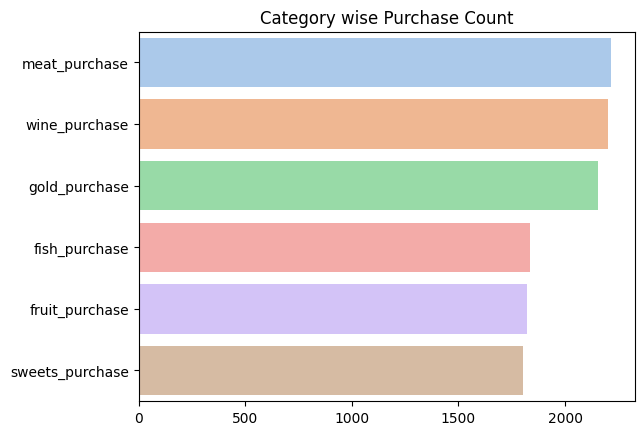

In [53]:
wine_purchase = df_customer[df_customer['spent_on_wines'] != 0]
fruit_purchase =  df_customer[df_customer['spent_on_fruits'] != 0]
meat_purchase =  df_customer[df_customer['spent_on_meat'] != 0]
fish_purchase =  df_customer[df_customer['spent_on_fish'] != 0]
sweets_purchase =  df_customer[df_customer['spent_on_sweet'] != 0]
gold_purchase =  df_customer[df_customer['spent_on_gold'] != 0]

category_purchase = pd.DataFrame({
    'wine_purchase' : wine_purchase['spent_on_wines'],
    'fruit_purchase' : fruit_purchase['spent_on_fruits'],
    'meat_purchase' : meat_purchase['spent_on_meat'],
    'fish_purchase' : fish_purchase['spent_on_fish'],
    'sweets_purchase' : sweets_purchase['spent_on_sweet'],
    'gold_purchase' : gold_purchase['spent_on_sweet']
})

total_purchase = category_purchase.agg({
    'wine_purchase' : 'count',
    'fruit_purchase' : 'count',
    'meat_purchase' : 'count',
    'fish_purchase' : 'count',
    'sweets_purchase' : 'count',
    'gold_purchase': 'count'
}).sort_values(ascending = False)

sns.barplot(x = total_purchase,y = total_purchase.index, palette= 'pastel')
plt.title('Category wise Purchase Count')

Meat is the top-selling product, followed by wine and gold.

Text(0.5, 1.0, 'Category wise Sales')

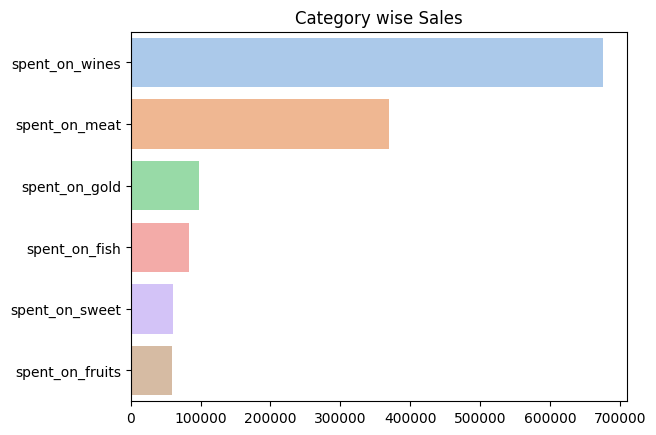

In [54]:
# total money spent on various items offered by the company
total_spent = df_customer.agg({
    'spent_on_wines' : 'sum',
    'spent_on_fruits' : 'sum',
    'spent_on_meat' : 'sum',
    'spent_on_fish' : 'sum',
    'spent_on_sweet' : 'sum',
    'spent_on_gold': 'sum'
}).sort_values(ascending = False)

sns.barplot(x = total_spent,y = total_spent.index, palette= 'pastel')
plt.title('Category wise Sales')

In [55]:
round(df_customer['enrollment_date'].dt.year.value_counts(normalize = True)*100,1)

enrollment_date
2013    52.9
2014    25.0
2012    22.1
Name: proportion, dtype: float64

About 52.9% of the existing customers have enrolled in the year 2013, a figure greater than the combined enrollments in both 2012 and 2014.

**The present notebook is a work in progress and remains incomplete. I am actively engaged in its development.**

If you find this notebook helpful, please consider liking it and feel free to leave a comment if you have any questions. Your feedback is greatly appreciated!

In [56]:
# total purchase 
# total spent

df_customer.columns

Index(['ID', 'birth_year', 'education', 'marital_status', 'income', 'kids',
       'teens', 'enrollment_date', 'days_since_last_purchase',
       'spent_on_wines', 'spent_on_fruits', 'spent_on_meat', 'spent_on_fish',
       'spent_on_sweet', 'spent_on_gold', 'purchases_with_discount',
       'web_purchase', 'catalog_purchase', 'store_purchase',
       'website_visit_last_month', 'campaign3', 'campaign4', 'campaign5',
       'campaign1', 'campaign2', 'complain', 'Z_CostContact', 'Z_Revenue',
       'last_campaign'],
      dtype='object')